# Project: Investigating the TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used in this analysis is The Move Database (TMDb), which contains info on movies from the year 2001 to 2015. In this analysis, I'll be exploring trends in movie ratings, particularly how what factors have an influence on voter ratings.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print(df.shape)
df.describe()

(10866, 21)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [23]:
df[df['budget'] == 0].shape[0] / df.shape[0]

0.5242039388919566

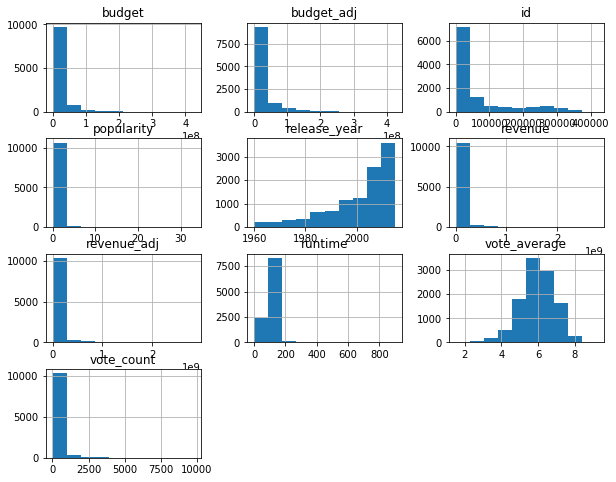

In [20]:
df.hist(figsize=(10, 8));

In [4]:
# Problem 1: we won't need all these columns for the questions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Problem 2: there are duplicate rows of Tekken
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
# Problem 3: lots of 0 values for budget and revenue columns
print(df[df.budget == 0].shape)
df[df.revenue == 0].shape

(5696, 21)


(6016, 21)

### Data Cleaning

#### 1. Keep columns useful for analysis only

In [7]:
# the only columns we'll need for this analysis are cast, production_companies, budget, revenue, vote_average, and original_title
df2 = df[['original_title', 'vote_average', 'cast', 'production_companies', 'budget', 'revenue']].copy()
df2.columns

Index(['original_title', 'vote_average', 'cast', 'production_companies',
       'budget', 'revenue'],
      dtype='object')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   vote_average          10866 non-null  float64
 2   cast                  10790 non-null  object 
 3   production_companies  9836 non-null   object 
 4   budget                10866 non-null  int64  
 5   revenue               10866 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 509.5+ KB


#### 2. Drop duplicates

In [9]:
df2.drop(index=df2[df2.duplicated()].index, inplace=True)
sum(df2.duplicated())

0

#### 3. Zero values

I could drop the rows with 0 values but there is relevant data there in the `cast` column. I will leave it and ignore these values in my later analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Q1: Which actors have a track record of being in movies with higher ratings?

In [11]:
# get a dict with all actors as keys and a list of [sum_of_ratings, number_of_ratings] like below
# results = {
#     'actor1': [35.8, 4], 
#     'actor2': [23, 3]
# }
def gather_ratings(names, ratings):
    results = {}
    for i, name_list in enumerate(names):
        name_list = name_list.split("|")
        for name in name_list:
            name = name.strip()
            if name not in results:
                results[name] = [0, 0]
            results[name][0] += ratings[i]
            results[name][1] += 1
    return results

In [12]:
# not all of the movies have a cast listed, so we need to gather ratings of movies with non-null cast
nn_cast_df = df2[~df2['cast'].isnull()]
nn_cast_df.reset_index(inplace=True)
actor_ratings = gather_ratings(nn_cast_df.cast, nn_cast_df.vote_average)

In [13]:
# takes the dictionary of actors and converts the values to an average
def average_ratings(names):
    results = {}
    for name in names:
        rating = names[name]
        results[name] = rating[0] / rating[1]
    return results        

In [14]:
# average all the ratings for actors
avg_actor_ratings = average_ratings(actor_ratings)

In [15]:
# order actors by ratings, highest ratings first
ordered = sorted(avg_actor_ratings, key=avg_actor_ratings.get, reverse=True)
ordered[:10]

['Mark Cousins',
 'Jean-Michel Frodon',
 'Cari Beauchamp',
 'Agnes de Mille',
 'Oona Chaplin',
 'Sam Brown',
 'Jon Carin',
 'Mikael Ã…kerfeldt',
 'Martin "Axe" Axenrot',
 'Martin Mendez']

In [16]:
# get the actors with the top 10 ratings
top_ten_ratings = []
for i in range(10):
    top_ten_ratings.append(avg_actor_ratings[ordered[i]])

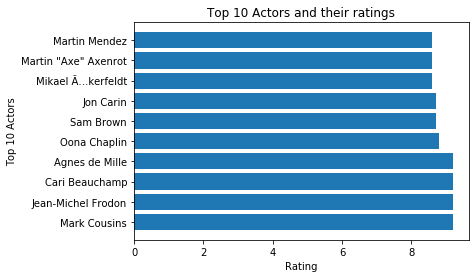

In [17]:
# plot a bar chart showing Top 10
plt.barh(np.arange(1, 11), top_ten_ratings, tick_label=ordered[:10])
plt.ylabel('Top 10 Actors')
plt.xlabel('Rating')
plt.title('Top 10 Actors and their ratings');

### Research Q2: Does a bigger budget necessarily mean better ratings?

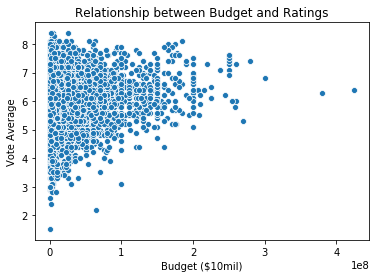

In [18]:
# plot the points that have values greater than 0 in the budget column
sns.scatterplot(data=df2[df2.budget > 0], x='budget', y='vote_average')
plt.xlabel('Budget ($10mil)')
plt.ylabel('Vote Average')
plt.title('Relationship between Budget and Ratings');

<a id='conclusions'></a>
## Conclusions

### Q1: Which actors have a track record of being in movies with higher ratings?
- Mark Cousins
- Jean-Michel Frodon
- Cari Beauchamp
- Agnes de Mille
- Oona Chaplin
- Sam Brown
- Jon Carin
- Mikael Ã…kerfeldt
- Martin "Axe" Axenrot
- Martin Mendez

#### Q1 Limitations: 
When finding the top 10 actor ratings, these ratings don't have much to do with the actors' performance themselves, but rather to do with the overall ratings of the movie. It would be a much more interesting and different analysis if we had reviews/ratings of actors' performances.

### Q2: Does a bigger budget necessarily mean better ratings?
No. The data points in the budget vs rating plot seem to cluster in the top left corner of the plot, suggesting that a higher budget does not correlate with higher ratings. In fact, the opposite seems true. 

#### Q2 Limitations:
Over 50% of the data has 0 values for the budget. That much missing data could really change the results of this analysis.